In [78]:
import tensorflow as tf
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skimio
import skimage

from tensorflow.keras.layers import Flatten,Conv2D,Dense
from glob import glob
import os

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.1.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
tf.debugging.set_log_device_placement(True)

In [3]:
dir = os.path.join('..', 'LPR')
img_dir = os.path.join(dir, 'dataset', 'plate_train')

images = glob(os.path.join(img_dir, '*.png'))

print(images[0:5])

['..\\LPR\\dataset\\plate_train\\I00000.png', '..\\LPR\\dataset\\plate_train\\I00001.png', '..\\LPR\\dataset\\plate_train\\I00002.png', '..\\LPR\\dataset\\plate_train\\I00003.png', '..\\LPR\\dataset\\plate_train\\I00004.png']


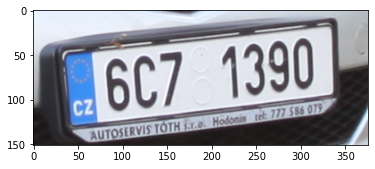

In [10]:
plt.imshow(skimio.imread(images[5]))

In [17]:
width = 128
height = 128

x=[]   #images as array

for img in images:
    full_img = skimio.imread(img)
    x.append(skimage.transform.resize(full_img, (width,height), anti_aliasing=True))

In [24]:
dataset = np.asarray(x, dtype= np.float32)
print(dataset.shape, dataset.dtype)

(141, 128, 128, 3) float32


In [58]:
#Grayscale
x_train = skimage.color.rgb2gray(dataset)

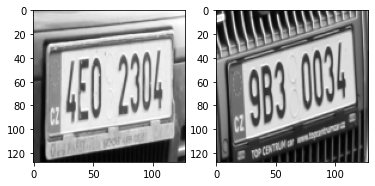

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()

ax[0].imshow(x_train[0], cmap = 'gray')
ax[1].imshow(x_train[30], cmap = 'gray')

In [62]:
x_train = skimage.filters.gaussian(x_train, sigma = 1, truncate = 1/5)

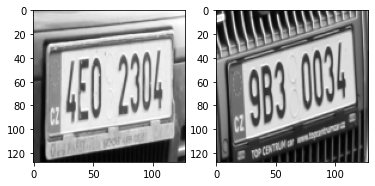

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()

ax[0].imshow(x_train[0], cmap = 'gray')
ax[1].imshow(x_train[30], cmap = 'gray')

In [64]:
x_train1 = []
for img in x_train:
    x_train1.append(skimage.filters.laplace(img, ksize=5))

x_train = np.asarray(x_train1, dtype= np.float32)

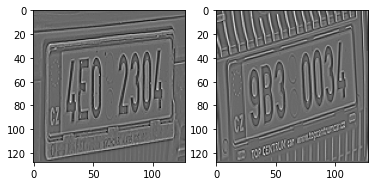

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()

ax[0].imshow(x_train[0], cmap = 'gray')
ax[1].imshow(x_train[30], cmap = 'gray')

In [66]:
print(x_train.shape)
print(x_train.dtype)

(141, 128, 128)
float32


In [67]:
x_train = tf.convert_to_tensor(x_train,dtype=tf.float32)

In [68]:
x_train.shape

TensorShape([141, 128, 128])

In [69]:
y = tf.ones((x_train.shape[0],1))

In [70]:
model=Sequential()

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation="softmax"))

model.compile(optimizer='Adam',metrics=[tf.keras.metrics.Accuracy()], loss='binary_crossentropy')

In [75]:
model.build(input_shape= x_train.shape)

In [76]:
model.fit(x_train,y,epochs=64 ,steps_per_epoch=1)

Train on 141 samples
Epoch 1/64
141/141 [==============================] - 0s 191us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/64
141/141 [==============================] - 0s 78us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/64
141/141 [==============================] - 0s 85us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/64
141/141 [==============================] - 0s 120us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/64
141/141 [==============================] - 0s 127us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/64
141/141 [==============================] - 0s 120us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/64
141/141 [==============================] - 0s 156us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/64
141/141 [==============================] - 0s 106us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/64
141/141 [==============================] - 0s 64us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/6

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2097280   
_________________________________________________________________
dense_1 (Dense)              multiple                  129       
Total params: 2,097,409
Trainable params: 2,097,409
Non-trainable params: 0
_________________________________________________________________
